In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from matplotlib.colors import ListedColormap
sns.set()
colors = sns.color_palette("husl")

In [2]:
from sklearn.datasets import load_iris
train,target = load_iris(return_X_y=True)
train = train[:,:2]


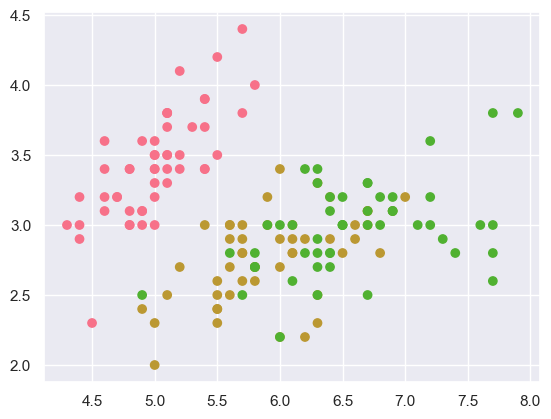

In [3]:
cm = ListedColormap(colors[:3])
plt.scatter(train[:,0],train[:,1],c=target,cmap=cm)

## KMeans预测

In [4]:
from sklearn.cluster import KMeans

In [5]:
# n_clusters=3 聚为多少类
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(train)

Text(0.5, 1.0, 'True')

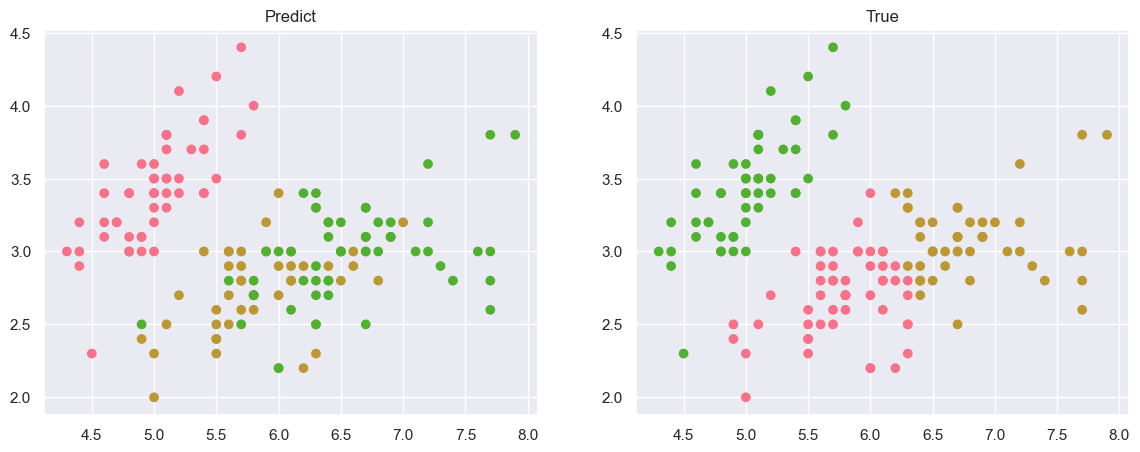

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cm)
plt.title("Predict")

plt.subplot(1,2,2)
plt.scatter(train[:,0],train[:,1],c=y_,cmap=cm)
plt.title("True")

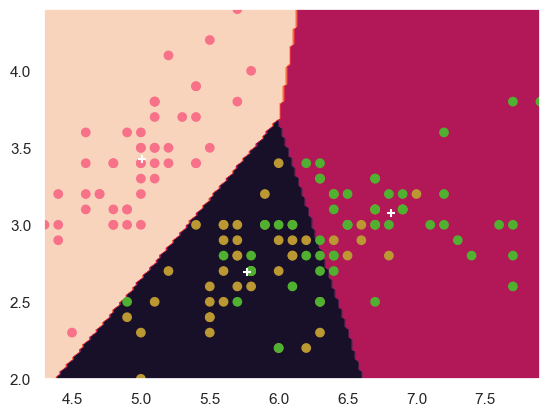

In [7]:
X = np.linspace(train[:,0].min(),train[:,0].max(),150)
y = np.linspace(train[:,1].min(),train[:,1].max(),150)

XX,yy = np.meshgrid(X,y)

zz = kmean.predict(np.c_[XX.ravel(),yy.ravel()])
zz.shape = XX.shape

# 获取聚类中心
centers = kmean.cluster_centers_

# 绘制聚类范围
plt.contourf(XX,yy,zz)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cm)
# 绘制聚类中心
plt.scatter(centers[:,0],centers[:,1],color="white",marker="+")
plt.show()

## 轮廓系数

In [8]:
from sklearn.metrics import silhouette_score #返回所有点的平均轮廓系数
from sklearn.datasets import make_blobs

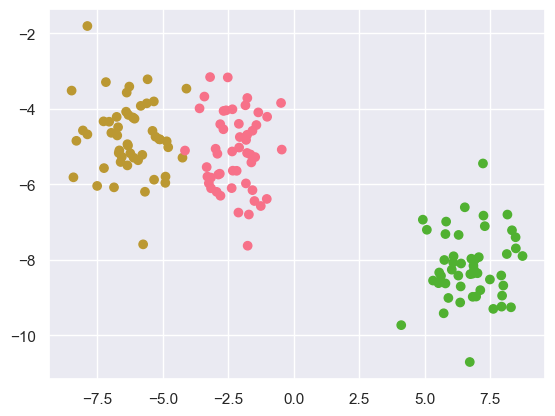

In [9]:
X,y = make_blobs(n_samples=150,n_features=2,centers=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm)

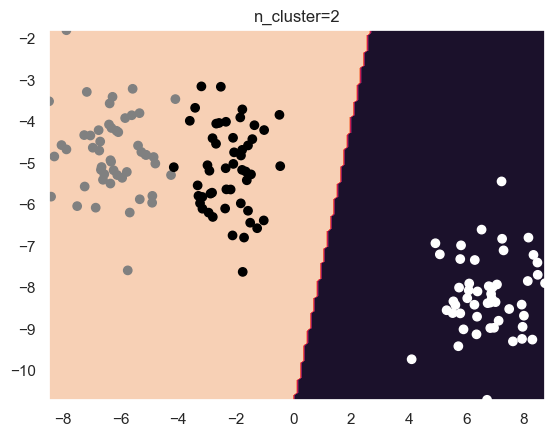

n_cluster=2
轮廓系数为:0.7685544763119148


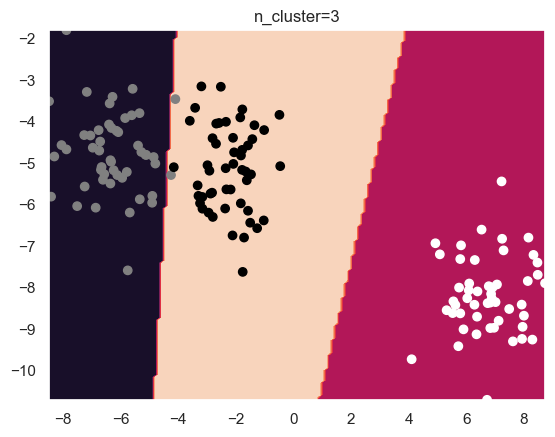

n_cluster=3
轮廓系数为:0.6628000762218261


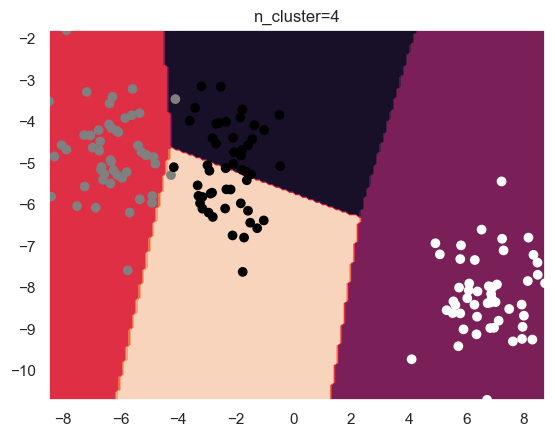

n_cluster=4
轮廓系数为:0.5772392850620006


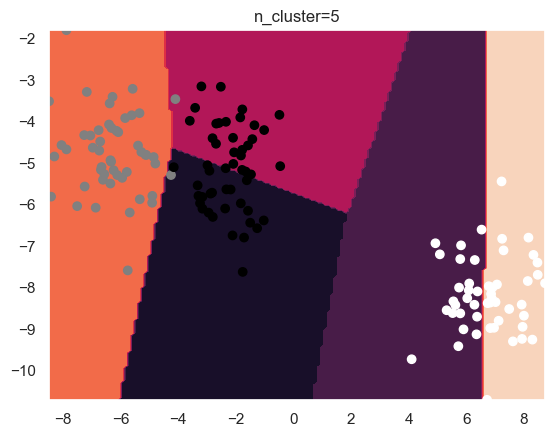

n_cluster=5
轮廓系数为:0.4181276068965761


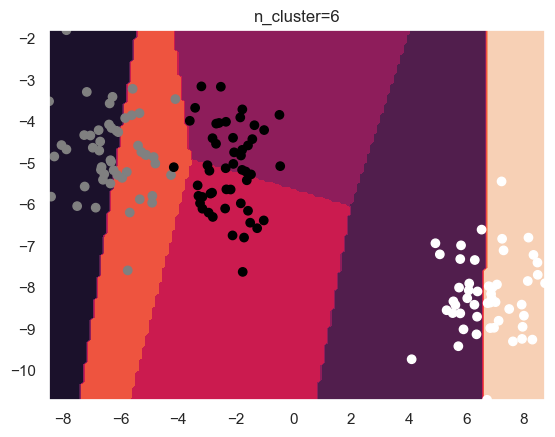

n_cluster=6
轮廓系数为:0.3450883767164591


In [10]:
for n_cluster in [2,3,4,5,6]:
    kmean = KMeans(n_clusters=n_cluster)
    
    kmean.fit(X)
    # 训练数据的预测结果
    y_ = kmean.predict(X)
    
    a = np.linspace(X[:,0].min(),X[:,0].max(),150)
    b = np.linspace(X[:,1].min(),X[:,1].max(),150)

    XX,yy = np.meshgrid(a,b)
    # 测试数据的预测结果
    zz = kmean.predict(np.c_[XX.ravel(),yy.ravel()])
    zz.shape = XX.shape
    
    # 绘制分类边界
    plt.contourf(XX,yy,zz)
    
    # 绘制原始数据
    plt.scatter(X[:,0],X[:,1],c=y,cmap="gray")
    plt.title(f"n_cluster={n_cluster}")
    plt.show()
    
    score = silhouette_score(X,y_)
    print(f"n_cluster={n_cluster}\n轮廓系数为:{score}")
    

## 常见问题

### 标准偏差不同

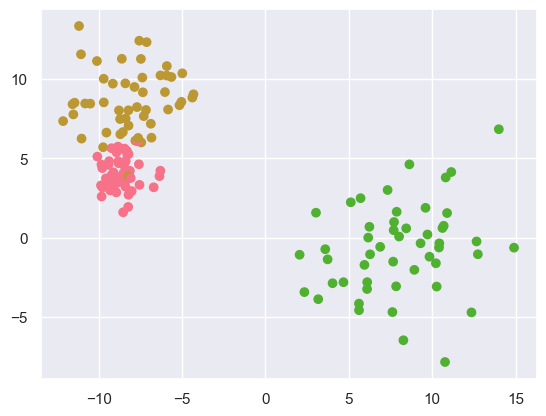

In [11]:
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=[1,2,3])
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm)

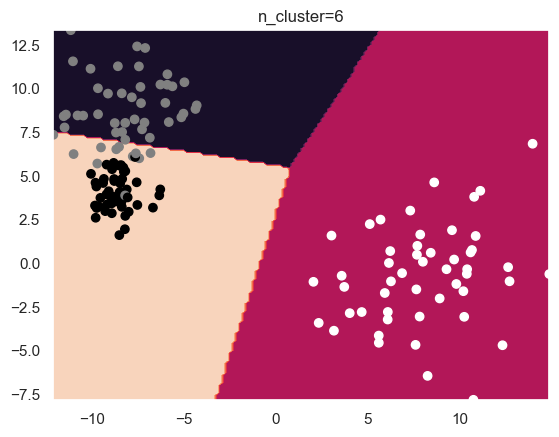

n_cluster=6
轮廓系数为:0.577534716803974


In [12]:
kmean = KMeans(n_clusters=3)
    
kmean.fit(X)
# 训练数据的预测结果
y_ = kmean.predict(X)

a = np.linspace(X[:,0].min(),X[:,0].max(),150)
b = np.linspace(X[:,1].min(),X[:,1].max(),150)

XX,yy = np.meshgrid(a,b)
# 测试数据的预测结果
zz = kmean.predict(np.c_[XX.ravel(),yy.ravel()])
zz.shape = XX.shape

# 绘制分类边界
plt.contourf(XX,yy,zz)

# 绘制原始数据
plt.scatter(X[:,0],X[:,1],c=y,cmap="gray")
plt.title(f"n_cluster={n_cluster}")
plt.show()

score = silhouette_score(X,y_)
print(f"n_cluster={n_cluster}\n轮廓系数为:{score}")

### 样本数量不同

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

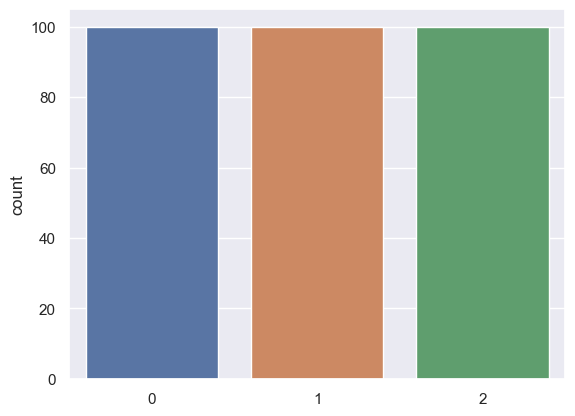

In [51]:
X,y = make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=2)
sns.countplot(y)

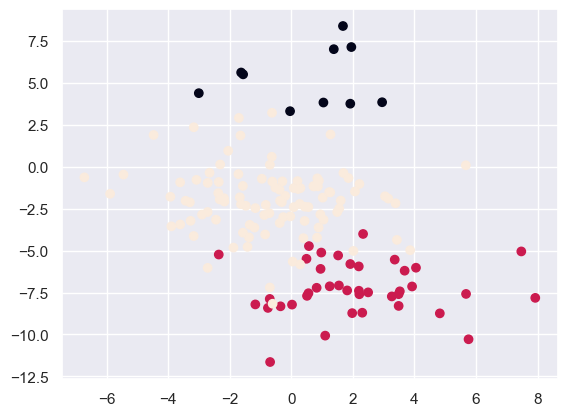

In [52]:
X1 = X[y==0][:10]
X2 = X[y==1][:40]
X3 = X[y==2][:100]

X = np.concatenate((X1,X2,X3))
y = [0]*10 + [1]*40 + [2]*100

plt.scatter(X[:,0],X[:,1],c=y)

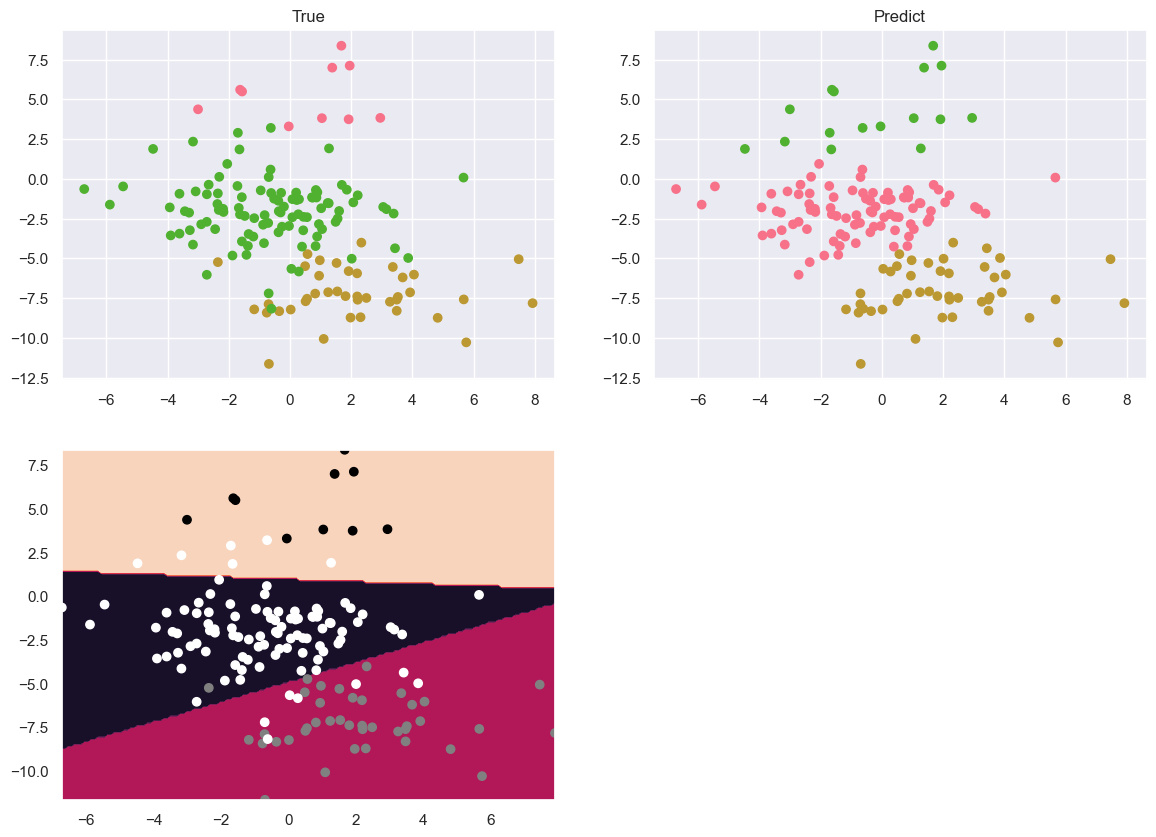

In [61]:
kmeans = KMeans(n_clusters=3)
y_ = kmeans.fit_predict(X)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm)
plt.title("True")

plt.subplot(2,2,2)
plt.scatter(X[:,0],X[:,1],c=y_,cmap=cm)
plt.title("Predict")


plt.subplot(2,2,3)
a = np.linspace(X[:,0].min(),X[:,0].max(),150)
b = np.linspace(X[:,1].min(),X[:,1].max(),150)
XX,yy = np.meshgrid(a,b)
# 测试数据的预测结果
zz = kmeans.predict(np.c_[XX.ravel(),yy.ravel()])
zz.shape = XX.shape
# 绘制分类边界
plt.contourf(XX,yy,zz)
# 绘制原始数据
plt.scatter(X[:,0],X[:,1],c=y,cmap="gray")

plt.show()

## 聚类 demo

In [65]:
zoo = pd.read_csv("./AsiaZoo.txt",header=None)
zoo.columns = ["国家","2006世界杯","2010世界杯","2007亚洲杯"]

In [66]:
zoo.head()

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2


In [69]:
train = zoo[["2006世界杯","2010世界杯","2007亚洲杯"]].copy()
train.head()

,2006世界杯,2010世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2


### 四个组别，n_clusters=3

In [112]:
kmeans = KMeans(n_clusters=4)
y_ = kmeans.fit_predict(train)
for i in [0,1,2,3]:
    countrys = zoo["国家"][y_==i]
    print(countrys.tolist())

['卡塔尔', '阿联酋', '乌兹别克斯坦', '巴林', '朝鲜']
['日本', '韩国']
['中国', '伊拉克', '泰国', '越南', '阿曼', '印尼']
['伊朗', '沙特']


In [113]:
# 四个组别的轮廓系数
silhouette_score(train,y_)

0.5740046807765532

### 三个组别，n_clusters=3

In [114]:
kmeans1 = KMeans(n_clusters=3)
y1_ = kmeans1.fit_predict(train)
for i in [0,1,2]:
    countrys = zoo["国家"][y1_==i]
    print(countrys.tolist())

['伊朗', '沙特', '乌兹别克斯坦', '巴林', '朝鲜']
['中国', '伊拉克', '卡塔尔', '阿联酋', '泰国', '越南', '阿曼', '印尼']
['日本', '韩国']


In [115]:
# 三个组别的轮廓系数
silhouette_score(train,y1_)

0.5349542135842207

### 两个组别，n_clusters=2

In [116]:
kmeans2 = KMeans(n_clusters=2)
y2_ = kmeans2.fit_predict(train)
for i in [0,1]:
    countrys = zoo["国家"][y2_==i]
    print(countrys.tolist())

['中国', '伊朗', '沙特', '伊拉克', '卡塔尔', '阿联酋', '乌兹别克斯坦', '泰国', '越南', '阿曼', '巴林', '朝鲜', '印尼']
['日本', '韩国']


In [117]:
# 两个组别的轮廓系数
silhouette_score(train,y2_)

0.6246539799361969

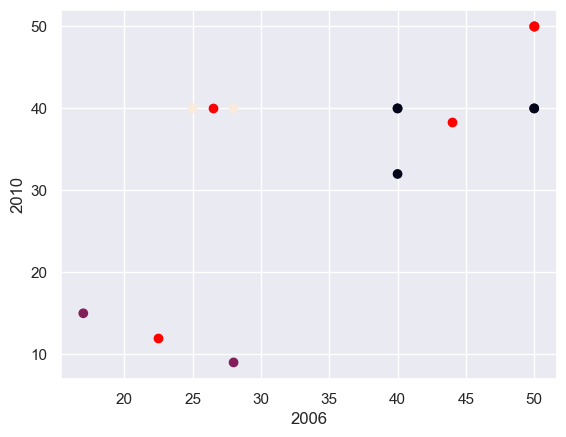

In [119]:
plt.scatter(train.values[:,0],train.values[:,1],c=y_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red")
plt.xlabel("2006")
plt.ylabel("2010")
plt.show()

### 后续操作

可以进行有监督学习

## 图片压缩 Demo

把图片颜色数据聚类分析成N个类别，用中心点颜色替换成其他颜色

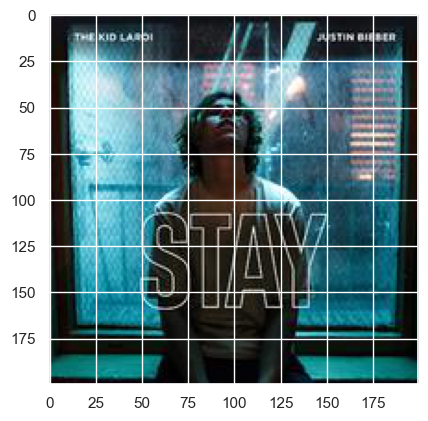

In [123]:
hero = plt.imread("./1.jpeg")
plt.imshow(hero)

In [124]:
hero.shape

(200, 200, 3)

In [125]:
data = hero.reshape(-1,3)
data.shape

(40000, 3)

In [126]:
pd.DataFrame(data=data,columns=list("RGB"))

,R,G,B
0,19,20,25
1,19,20,25
2,19,20,25
3,20,19,25
4,21,18,25
...,...,...,...
39995,6,0,6
39996,4,0,4
39997,6,0,4
39998,8,0,6


In [127]:
# 把原始图像的颜色聚类为三种
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(data)

In [128]:
pd.Series(y_).value_counts()

0    18378
2    13488
1     8134
dtype: int64

In [129]:
# 获取聚类中心
kmean.cluster_centers_

array([[ 22.88765513,  27.06003701,  25.54365339],
       [138.07860208, 187.03776824, 199.89883507],
       [ 42.77169153, 111.49016552, 126.58880724]])

In [130]:
colors = kmean.cluster_centers_/255

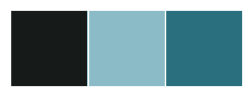

In [131]:
sns.palplot(colors)

In [132]:
a = np.array([10,20,30])
b = [0,1,2,0,0]
a[b]

array([10, 20, 30, 10, 10])

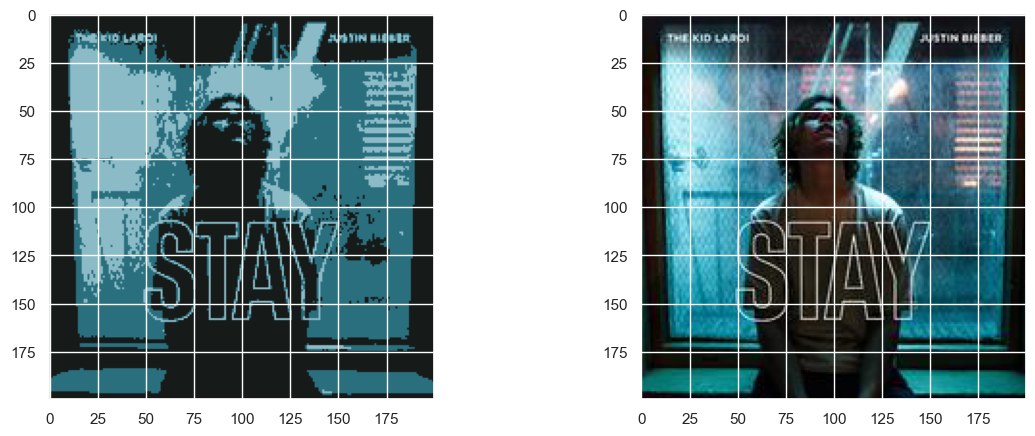

In [138]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.imshow(colors[y_].reshape(hero.shape))
plt.subplot(1,2,2)
plt.imshow(hero)
plt.show()